# Employee Attrition Exploratory Data Analysis.

In [1]:
#pip install pandas
#to install pandas or check if its already installed
#This allows us to perform data analysis in jupyter

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
#numpy allows us to perform analysis on large data

In [3]:
data=pd.read_csv('/Users/dikshya/Desktop/Employeedata.csv') 
 #importdataset and data is the name given for dataframe.it can be any name like df

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee_ID                14900 non-null  int64 
 1   Age                        14900 non-null  int64 
 2   Gender                     14900 non-null  object
 3   Years                      14900 non-null  int64 
 4   Role                       14900 non-null  object
 5   Income                     14900 non-null  int64 
 6   Worklife_Balance           14900 non-null  object
 7   Job_Satisfaction           14900 non-null  object
 8   Performance _Rating        14900 non-null  object
 9    Promotions                14900 non-null  int64 
 10  Overtime                   14900 non-null  object
 11   Home_Distance             14900 non-null  int64 
 12  Education                  14900 non-null  object
 13  Marital_Status             14900 non-null  object
 14  Depend

# Data Cleaning

In [5]:
# Returns dataset removing duplicates
data = data.drop_duplicates()


In [6]:
#checking for null values
data.isnull()


,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.drop_duplicates()

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


# Data Analysis

In [8]:
data.describe() #returns the statistical summary of the dataframe 
#count, mean, median (or 50th percentile) standard variation, min-max, 

,Employee_ID,Age,Years,Income,Promotions,Home_Distance,Dependents,Company_Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


The standard deviation refers to dispersion of data in relation to the mean/average.The distance bettween each data point and mean.

In [9]:
data.head(10)
#first 10 columns

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
5,3496,45,Female,30,Healthcare,8104,Fair,High,Average,0,...,0,Senior,Large,75,No,No,No,Good,Low,Stayed
6,46775,22,Female,5,Healthcare,8700,Good,High,Average,0,...,0,Mid,Small,48,No,No,No,Poor,High,Stayed
7,72645,34,Female,15,Technology,11025,Fair,Medium,High,1,...,4,Entry,Large,16,No,No,No,Good,Low,Left
8,4941,48,Female,40,Technology,11452,Good,Medium,Below Average,0,...,1,Mid,Large,52,No,No,No,Good,Medium,Stayed
9,65181,55,Female,16,Media,5939,Poor,High,Average,0,...,1,Entry,Small,46,No,No,No,Good,High,Stayed


In [10]:
data.tail(10)
#last 10 columns

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
14890,54362,30,Female,6,Media,6353,Fair,Medium,Below Average,0,...,3,Senior,Small,31,Yes,No,No,Good,Very High,Stayed
14891,44995,39,Male,25,Finance,11586,Good,High,Average,0,...,2,Entry,Medium,58,No,No,No,Good,Low,Left
14892,16169,47,Male,13,Education,4024,Fair,Low,Below Average,2,...,6,Mid,Large,24,Yes,No,Yes,Good,Medium,Stayed
14893,6323,34,Male,25,Media,6717,Good,High,High,1,...,0,Mid,Large,98,No,No,No,Good,Medium,Stayed
14894,68796,52,Male,13,Technology,9296,Poor,High,Average,1,...,1,Entry,Small,55,No,Yes,No,Poor,Low,Stayed
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed
14899,73042,59,Female,48,Education,3774,Good,High,Below Average,1,...,4,Mid,Large,118,No,No,No,Good,Very High,Left


In [11]:
data.mean()
#mean of dataset numerical values

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_95899/3920377326.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Employee_ID       37339.022081
Age                  38.385235
Years                15.592416
Income             7287.306040
 Promotions           0.834362
 Home_Distance       49.927315
Dependents            1.659329
Company_Tenure       55.603624
dtype: float64

In [12]:
data.median()
 #median of dataset numerical values

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_95899/51376076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Employee_ID       37433.0
Age                  38.0
Years                13.0
Income             7332.0
 Promotions           1.0
 Home_Distance       50.0
Dependents            1.0
Company_Tenure       56.0
dtype: float64

In [13]:

#Median of first 100

#To calculate the first 100 datas median we calculate the first 100 using head functtion and use median function
first_100 = data.head(100)

first_100.median()

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_95899/644049177.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  first_100.median()


Employee_ID       33233.0
Age                  38.0
Years                12.0
Income             7756.0
 Promotions           1.0
 Home_Distance       50.0
Dependents            1.5
Company_Tenure       56.0
dtype: float64

# Attrition Analysis

<AxesSubplot:title={'center':'Attrition Rate'}>

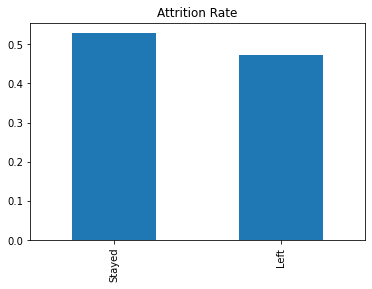

In [14]:
data['Attrition'].value_counts(normalize=True).plot(kind='bar', title='Attrition Rate')


In [15]:
Attrition_Role = data.groupby(['Role', 'Attrition']).size()
print(Attrition_Role)

Role        Attrition
Education   Left         1551
            Stayed       1617
Finance     Left          979
            Stayed       1084
Healthcare  Left         1658
            Stayed       1774
Media       Left         1078
            Stayed       1344
Technology  Left         1766
            Stayed       2049
dtype: int64


<AxesSubplot:xlabel='Role', ylabel='count'>

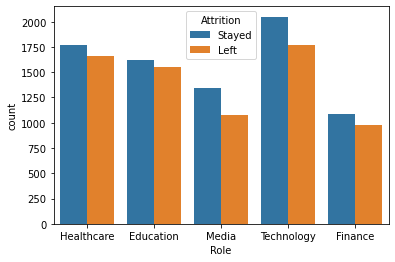

In [16]:
sns.countplot(x='Role', hue='Attrition', data=data)


 Key Findings:

Attrition is highest in the Technology industry (1766), followed closely by Healthcare (1658).
The lowest attrition is in the Finance industry (979).
All industries show more employees staying than leaving, indicating a retention majority across sectors.

# Attrition by Age group and Career Stages

We will be creating age bins to group ages based on career stages considering the career trajectory is normal or without any major gaps.

18–25: "Early Career"
26–35: "Mid Career"
36–45: "Experienced Professional"
46–60: "Late Career"
60+: "Retired/Pre-retired"


In [17]:
bins_age = [18, 25, 35, 45, 60 ]  
labels_age = ["Early Career", "Mid Career", "Experienced Professional", "Late Career", ]
data['Age_Group'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)



In [18]:
print(data[['Age','Age_Group']].head())

   Age                 Age_Group
0   36  Experienced Professional
1   35                Mid Career
2   50               Late Career
3   58               Late Career
4   39  Experienced Professional


In [19]:
attrition_age= data.groupby(['Age_Group', 'Attrition']).size()
print(attrition_age)

Age_Group                 Attrition
Early Career              Left         1275
                          Stayed       1184
Mid Career                Left         1775
                          Stayed       1903
Experienced Professional  Left         1606
                          Stayed       1956
Late Career               Left         2170
                          Stayed       2675
dtype: int64


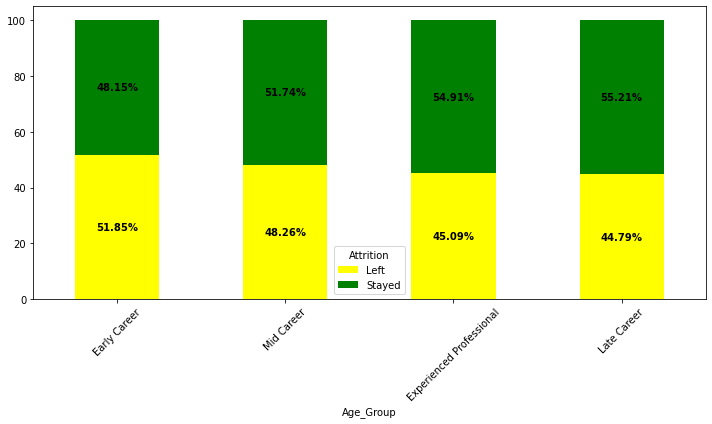

In [20]:
attrition_pivot = attrition_age.unstack(fill_value=0)

# Calculate the percentage of 'Left' and 'Stayed' for each 'Age_Group'
attrition_percentage = attrition_pivot.div(attrition_pivot.sum(axis=1), axis=0) * 100


# Plotting
ax = attrition_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['yellow', 'green'])

for c in ax.containers:
    
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # create custom labels with the bar height and the percent from the per column
    # the column labels in per and dfp are int, so convert label to int
    labels = [f'{v.get_height():0.2f}%' if v.get_height() >0 else '' for v in c]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')
    

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can conclude that typically people in early career/earlier age groups leave job for various reasons.It is the only category where rate of attrition is higher.In rest of the age group the number of people who stayed is higher.In late career however the percentage of people who stay at work is higer by 10.42% in comparision to people who left.This reflects older age group where employees may have been in job industry for a long time are comfortable with where they are at and try not to change jobs.It can also mean that people at older age group are close to retirinng so thyeir attrition low is late.

In [21]:
attrition_percentage

Attrition,Left,Stayed
Age_Group,,
Early Career,51.850346,48.149654
Mid Career,48.259924,51.740076
Experienced Professional,45.087030,54.912970
Late Career,44.788442,55.211558


#  Attrition  and Income

For Income bins lets assume
< 3,000: "Low Income"
4,000–6,000: "Middle Income"
7,000–10,000: "Upper Middle Income"
10,000: "High Income"

In [22]:
# Income Bins
bins_income = [0, 3000, 6000, 10000, float('inf')]  
labels_income = ["Low Income", "Middle Income", "Upper Middle Income", "High Income"]

data['Income_Group'] = pd.cut(data['Income'], bins=bins_income, labels=labels_income)


In [23]:
print(data[['Income', 'Income_Group']].head())

   Income         Income_Group
0    8029  Upper Middle Income
1    4563        Middle Income
2    5583        Middle Income
3    5525        Middle Income
4    4604        Middle Income


In [24]:
attrition_income= data.groupby(['Income_Group', 'Attrition']).size()
print(attrition_income)

Income_Group         Attrition
Low Income           Left           39
                     Stayed         49
Middle Income        Left         2167
                     Stayed       2396
Upper Middle Income  Left         4055
                     Stayed       4571
High Income          Left          771
                     Stayed        852
dtype: int64


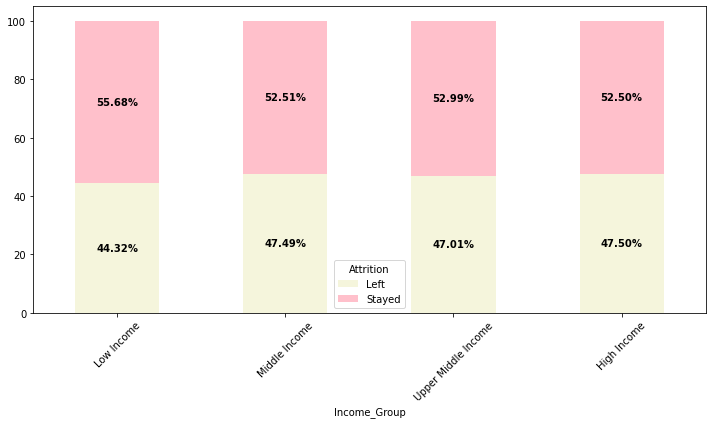

In [25]:
attrition_pivot = attrition_income.unstack(fill_value=0)

# Calculate the percentage of 'Left' and 'Stayed' for each 'Age_Group'
attrition_percentage = attrition_pivot.div(attrition_pivot.sum(axis=1), axis=0) * 100

# Plotting
ax = attrition_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['beige', 'pink'])
for c in ax.containers:
    
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # create custom labels with the bar height and the percent from the per column
    # the column labels in per and dfp are int, so convert label to int
    labels = [f'{v.get_height():0.2f}%' if v.get_height() >0 else '' for v in c]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')
    


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this dataset people making less money have have lower attrition rate by 11.36% compared to rest income levels.This can possibly relfect that they are not in financial position to leave a job even though they make less.Rest of the income groups seem to have similar ratio so I donot think income is a major factor in people's decision to leave a company.

# Home Distance and Attrition

In [26]:
bins_distance = [0, 7, 14, 21, 28, float('inf')]
labels_distance = ["Very Close", "Close", "Moderate Commute", "Far Commute", "Very Far Commute"]
data['Home_Distance_Category'] = pd.cut(data[' Home_Distance'], bins=bins_distance, labels=labels_distance)


In [28]:
print(data[['Home_Distance_Category',' Home_Distance']].head())

  Home_Distance_Category   Home_Distance
0       Very Far Commute              83
1       Very Far Commute              55
2                  Close              14
3       Very Far Commute              43
4       Very Far Commute              47


In [29]:
attrition_distance= data.groupby(['Home_Distance_Category', 'Attrition']).size()
print(attrition_distance)

Home_Distance_Category  Attrition
Very Close              Left          436
                        Stayed        621
Close                   Left          446
                        Stayed        667
Moderate Commute        Left          445
                        Stayed        586
Far Commute             Left          477
                        Stayed        551
Very Far Commute        Left         5228
                        Stayed       5443
dtype: int64


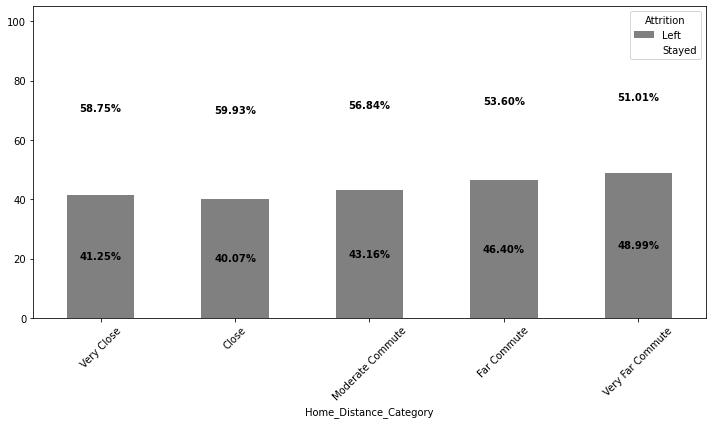

In [31]:
attrition_pivot = attrition_distance.unstack(fill_value=0)

# Calculate the percentage of 'Left' and 'Stayed' for each 'Age_Group'
attrition_percentage = attrition_pivot.div(attrition_pivot.sum(axis=1), axis=0) * 100

# Plotting
ax = attrition_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['grey', ''])
for c in ax.containers:
    
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # create custom labels with the bar height and the percent from the per column
    # the column labels in per and dfp are int, so convert label to int
    labels = [f'{v.get_height():0.2f}%' if v.get_height() >0 else '' for v in c]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')
    


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Null Hypothesis (
𝐻
0
H 
0
​
 ): Longer commute times do not affect employee attrition rates.
Alternative Hypothesis (
𝐻
𝑎
H 
a
​
 ): Longer commute times increase employee attrition rate

In [ ]:
#Change Categorical Columns Into Numerical

new_data = pd.get_dummies(data[['Attrition']])

print(new_data.to_string())

In [ ]:
left_count = new_data['Attrition_Left'].sum()
stayed_count = new_data['Attrition_Stayed'].sum()
print(f"Total Attrition_Left: {left_count}")
print(f"Total Attrition_Stayed: {stayed_count}")

In [ ]:
commute_attrition = data[data['Attrition'] == 1][' Home_Distance']
commute_stayed = data[data['Attrition'] == 0][' Home_Distance']

In [ ]:

# Perform t-test
t_stat, p_value = stats.ttest_ind(commute_attrition, commute_stayed)

print("T-statistic:", t_stat)
print("P-value:", p_value)




In [ ]:
sns.boxplot(x='Attrition', y=' Home_Distance', data=data)
plt.title("Commute Time vs Attrition")
plt.show()


# Home Distance
Hypothesis: Longer commutes drive higher attrition.

In [ ]:
# Group by Remote Work and Attrition
remote_attrition = new_data.groupby([Attrition']).size().unstack(fill_value=0)

# Add total employees in each group and calculate attrition rates
remote_attrition['Total'] = remote_attrition.sum(axis=1)
remote_attrition['Attrition_Rate'] = remote_attrition[1] / remote_attrition['Total'] * 100

# Display summary
print(remote_attrition)

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
sns.boxplot(x='Attrition', y='Promotions', data=data)


### Since this dataset is about employee attrition lets see what is the percent of folks surveyed that left companies.

In [ ]:
#To create Attrition Pie Chart
#Firstly count the attrition yes and no
Attrition_Count=data['Attrition'].value_counts()
labels = ['No Attrition', 'Attrition']
sizes = Attrition_Count.values #This determines the size by value
colors = ['skyblue', 'salmon']  # Colors for the pie slices

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Attrition Distribution', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


## Interestingly enough,the numbers are pretty close.The number of people who did not leave is slightly higher by 6.6%.

Lets explore on different categories

# Remote Work

In [ ]:
 #Pie to see Employee_RemoteworK   


#Firstly count the attrition yes and no
Remote_Work_count=data['Remote_Work'].value_counts()
labels = ['Remote', 'Not_Remote']
sizes = Remote_Work_count.values
colors = ['yellow', 'grey']  # Colors for the pie slices

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Remote Work Status', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



# Total Employees By Job Level

In [ ]:
job_level_counts = data.groupby('Job_Level').size().reset_index(name='Total_Employees')

# Step 3: Display the result
print(job_level_counts)


In [ ]:
sns.barplot(x='Job_Level',y='Total_Employees',data= job_level_counts)

We see most of the people in dataset are entry or mid level employees.The number of people working in senior level is few which is understandable because there are limited senior level positions in each company.

# Remote Work by Job Level

In [ ]:
sns.barplot(x='Job_Satisfaction', y='Attrition', data=data)


In [ ]:
Remotework_Joblevel = data.groupby(['Job_Level', 'Remote_Work']).size()
print(Remotework_Joblevel)


Lets find if there may be any correlation between Job level and remote work status

In [ ]:
x = Remotework_Joblevel.plot.barh(stacked=True, figsize=(10, 6), colormap='rainbow')



In each job level we can see that most of the employees do not have a remote job.As mentioned above in this survey most of the responders 

# Promotions

In [ ]:
promotions_count = data.groupby(' Promotions').size().reset_index(name= 'Number_of_promotions')
print (promotions_count)

In [ ]:
sns.barplot(x= ' Promotions',y= 'Number_of_promotions',data=promotions_count)


When we were calculating the mean above,the mean for promotions was 0.834362 which is evident because as we see over 7000 of the survey respondents have not have as promotions in their career yet.This is quite surprising so see as the numbers are hugely different from one another.

In [ ]:
#sns.barplot(x='Role',y='Income',data)

In [ ]:
sns.boxplot (Remotework_Joblevel)



In [ ]:
sns.boxplot(data=data,x='Remote_Work',y='Income')

# Highest  & Lowest Paid Job Fields

In [ ]:
sns.barplot(x='Role',y='Income',data=data)

In [ ]:
income_average_role = data.groupby('Role')['Income'].mean()
print(income_average_role)

In [ ]:
lines = income_average_role.plot.line(x='Role', y='Income', title='Average Income by Role')


In [ ]:
#Top  500 Highest Paid Employee and their role
Highest=data.sort_values('Income',ascending=False) 
Top_500 = Highest.head(500)
print(Top_500[['Employee_ID','Income','Role']])



In [ ]:
#Low 500 Highest Paid Employee and their role
Lowest=data.sort_values('Income',ascending=True)
Low_500=Lowest.head(500)
print(Low_500[['Employee_ID','Income','Role']])

In [ ]:
sns.barplot(x='Role',y='Income',data=Top_500)

In [ ]:
sns.barplot(x='Role',y='Income',data=Low_500)

Well its not surprising but we can conclude that tech sector and roles have the highest pay and education has the lowest average pay.On average tech roles have over double pay of what education sectors are paid.Affter that finance is the higher paid of the 5 fields we are analyzing.

Interestingly enough finance also has lowest paid roles.It may be possible that alot of finance roles are bvased on commision or there maybe major ghgap between each job level.
even when we did the sample of first 500 and last 500 data columnbs this analysis was consistent.

# Role ,Level and Income

Lets calculate average pay by job level and field to see if thgere is large gap in pay by level and field

In [ ]:

Income_level_role = data.groupby(['Role', 'Job_Level'])['Income'].mean()
print(Income_level_role)

In [ ]:
#sns.barplot(x=Income_level_role.index,  data = Income_level_role)

            

# Gender pay and job level 

In [ ]:
income_gender_joblevel= data.groupby(['Gender','Role','Job_Level','Years'])['Income'].mean()
print(income_gender_joblevel)

**1. Technology and Finance Dominate Income Levels**
Technology and Finance offer the highest average salaries across all job levels, with Technology starting at $9,085.69 for Entry-level roles.

Actionable Insight:Professionals seeking high-income roles should prioritize entering Technology or Finance sectors.

**2. Education and Media Lag in Income Growth**
Education has the lowest starting salaries (Entry-level: $4,465.83) and negligible growth across levels. Media follows with similarly flat salary progression.

Actionable Insight: These sectors need structural improvements in compensation to attract and retain talent.

**3. Healthcare Has Salary Stability but Limited Growth**
Healthcare roles provide steady but stagnant incomes, with Entry level  7,999.27 and senior $4,465.83

Actionable Insight: Professionals in Healthcare might find career growth through specialization rather than promotions.

**4. Income Growth Between Job Levels is Minimal Across Sectors**
Across sectors, the increase in income from Entry to Senior levels is modest, rarely exceeding a few hundred dollars.

Actionable Insight: Employees may rely on lateral career moves, bonuses, or upskilling to achieve significant salary growth.

**5. Entry-Level Salary Disparity Highlights Sector Inequality**
Entry-level salaries in Technology are nearly double those in Education, revealing a significant disparity between high- and low-paying sectors.

Actionable Insight: Policy interventions may be required to address income inequality across sectors.

**6. Mid-Career Stagnation is a Concern in Most Sectors**
Mid-level salaries in sectors like Education, Media, and Healthcare show minimal growth, leading to potential career stagnation.

Actionable Insight: Mid-career employees in these fields should consider transitioning to higher-paying roles or sectors.

**7. Non-Monetary Benefits May Drive Retention in Low-Paying Sectors**
Sectors like Education and Media might need to focus on offering work-life balance, job security, or meaningful work to retain talent, given their flat salary structures.

Actionable Insight: Employers in these sectors should emphasize intrinsic rewards and professional development opportunities.


In [ ]:
income_gender_joblevel.sns.barplot()

In [ ]:
correlation_matrix = data.corr()

# Apply gradient to the correlation matrix
correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None)

**Experience and Tenure**: Employees with more experience (Years) tend to have higher company tenure.We can see a correlation of 0.444 However, this doesn’t directly correlate with income or promotions.

**Minimal Influence of Promotions on Salary**: Promotions and salary (Income) have weak relationships, suggesting that promotions might not always lead to a significant increase in salary within this dataset.This is a very controversial take as we expect wit more responsibiliy comes a higher salary.

**Dependents and Other Variables:** The number of dependents seems to have minimal effect on other variables like salary, tenure, and promotions.There are no significant positive or negative correlation.

**Income and Experience:** There seems to be no clear link between Income and Years, suggesting that income might be more dependent on other factors (role, performance, etc.) than just experience.
These

In [ ]:
# Correlation matrix
plt.figure(figsize=(28, 24))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.plot.line('Job_Level','Promotions')

In [ ]:
# Correlation plot correlation = data['Income'].corr(data['new_data'])
print("correlation between Income and Home Distance: {'correlation'}")

In [ ]:
Attrition_Count=data.Attrition

# Prediction Modeling